#### Instructions
###### Follow the instructions given in comments prefixed with ## and write your code below that.
###### Also fill the partial code in given blanks. 
###### Don't make any changes to the rest part of the codes

### Answer the questions given at the end of this notebook within your report.

### You would need to submit your GitHub repository link. Refer to the PDF document for the instructions and details.





In [8]:
# from IPython import display
# display.Image(b)

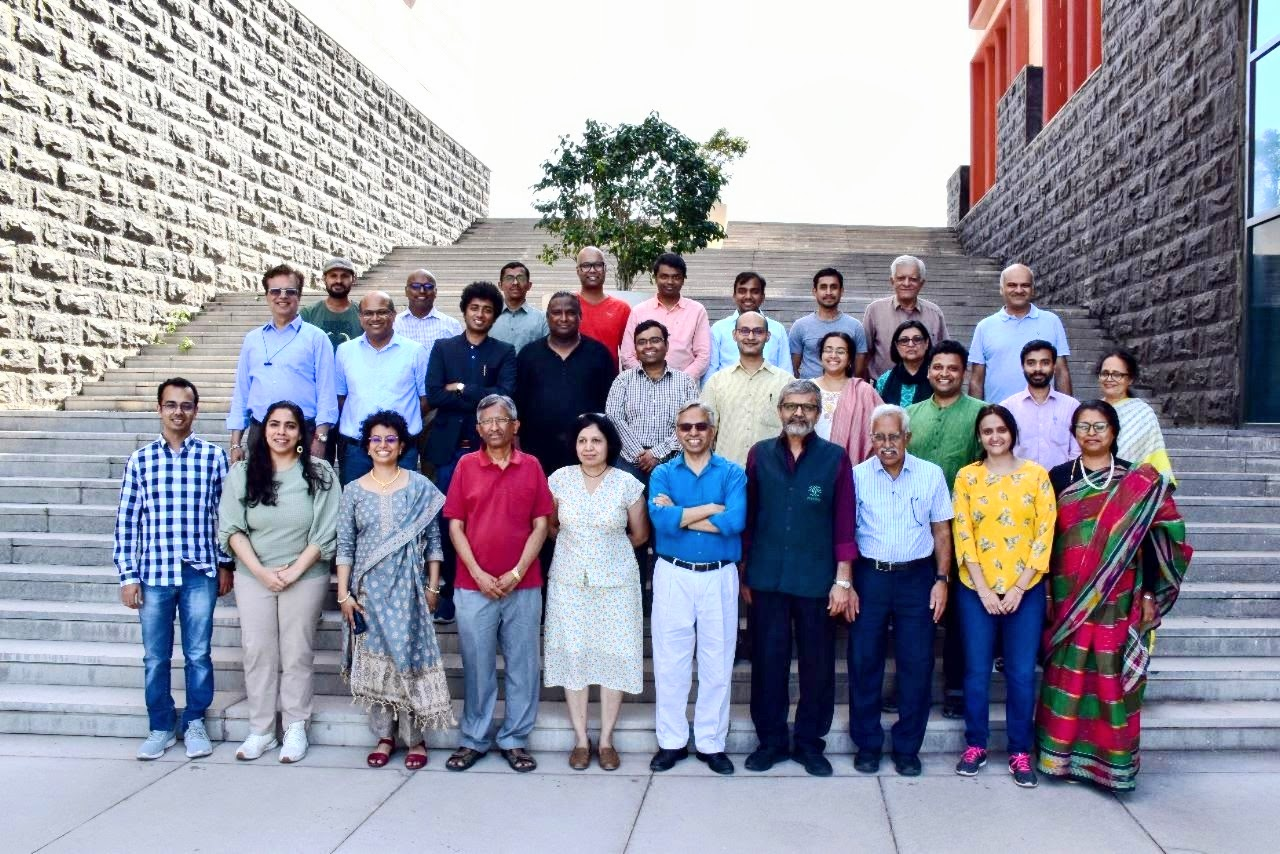

In [1]:
print(1)

1


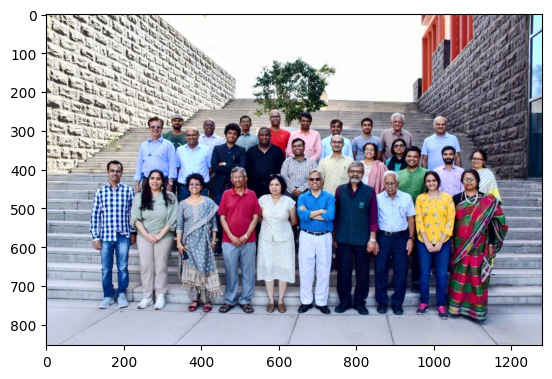

In [2]:
import cv2
import matplotlib.pyplot as plt
b="Plaksha_Faculty.jpg"
pl_f=cv2.imread(b)
pl_f = cv2.cvtColor(pl_f, cv2.COLOR_BGR2RGB)
plt.imshow(pl_f)

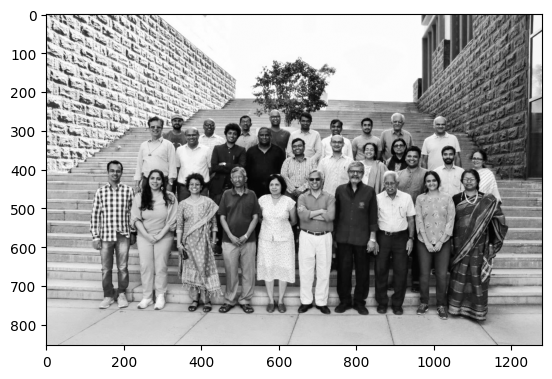

In [6]:

pla_f = cv2.cvtColor(pl_f, cv2.COLOR_BGR2GRAY)
plt.imshow(pla_f,cmap='gray')
# print(pla_f.shape)

In [3]:
import cv2
print(cv2.data.haarcascades)


C:\Users\DEll\AppData\Local\Programs\Python\Python313\Lib\site-packages\cv2\data\


In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial import distance 
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

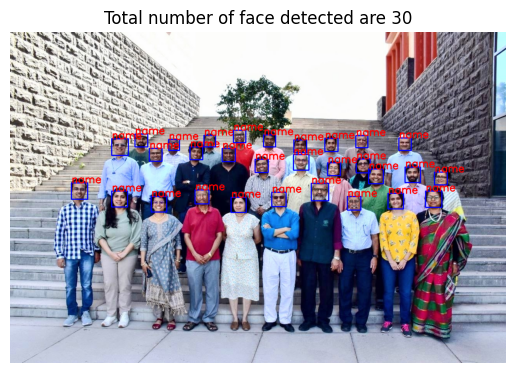

In [151]:
## Reading the image plaksha_Faculty.jpg
b="Plaksha_Faculty.jpg"
pl_f=cv2.imread(b)
img = cv2.cvtColor(pl_f, cv2.COLOR_BGR2RGB)
# plt.imshow(img)
## Convert the image to grayscale

gray_img = cv2.cvtColor(pl_f, cv2.COLOR_BGR2GRAY)
# plt.imshow(pla_f,cmap='gray')

  
# Loading the required haar-cascade xml classifier file
face_cascade = cv2.CascadeClassifier( cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
  
# Applying the face detection method on the grayscale image. 
## Change the parameters for better detection of faces in your case.
faces_rect = face_cascade.detectMultiScale(gray_img, 1.05, 4, minSize=(25,25), maxSize=(50,50))
 
# Define the text and font parameters
text ="name" ## The text you want to write
font = cv2.FONT_HERSHEY_SIMPLEX   ## Font type
font_scale = 0.9 ## Font scale factor
font_color = (255,0,0)  ## Text color in BGR format (here, it's red)
font_thickness = 2 ## Thickness of the text

  
# Iterating through rectangles of detected faces
for (x, y, w, h) in faces_rect:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    # Use cv2.putText to add the text to the image, Use text, font, font_scale, font_color, font_thickness here
    cv2.putText(img,text, (x,y),font, font_scale, font_color, font_thickness)
    
## Display the image and window title should be "Total number of face detected are #"  
# cv2.imshow(pla_f)
plt.title("Total number of face detected are 30")
plt.imshow(img)
plt.axis("off")
plt.show()
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [152]:
len(faces_rect)#checking no. of sides

30

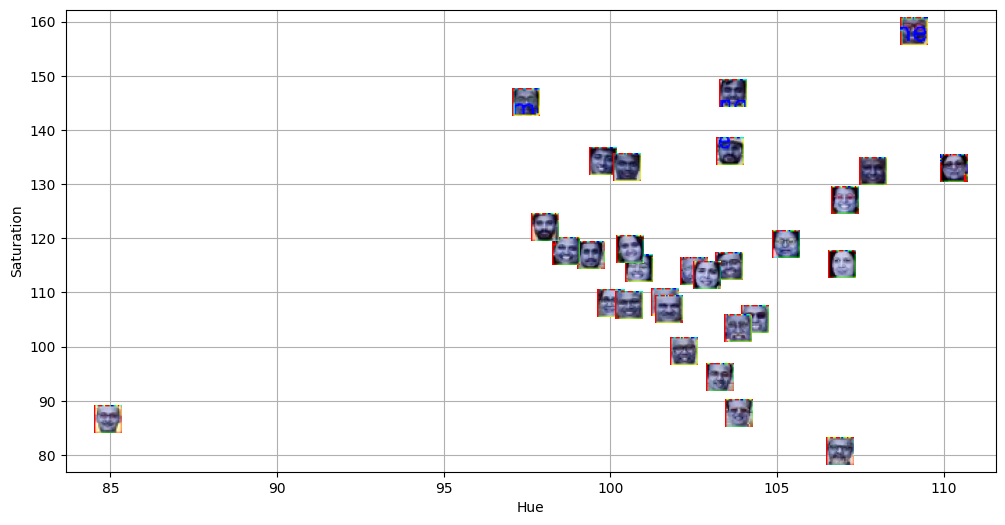

In [153]:

from matplotlib.offsetbox import OffsetImage, AnnotationBbox
# Extract face region features (Hue and Saturation)
img_hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV) ## call the img and convert it from BGR to HSV and store in img_hsv
hue_saturation = []
face_images = []  # To store detected face images

for (x, y, w, h) in faces_rect:
    face = img_hsv[y:y + h, x:x + w]
    hue = np.mean(face[:, :, 0])
    saturation = np.mean(face[:, :, 1])
    hue_saturation.append((hue, saturation))
    face_images.append(face)

hue_saturation = np.array(hue_saturation)
from sklearn.cluster import KMeans
## Perform k-Means clustering on hue_saturation and store in kmeans
kmeans =  KMeans(n_clusters=2, random_state=0, n_init="auto").fit(hue_saturation)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers
for i, (x,y,w,h ) in enumerate(faces_rect):
    im = OffsetImage(cv2.cvtColor(cv2.resize(face_images[i], (20, 20)), cv2.COLOR_HSV2RGB))
    ab = AnnotationBbox(im, (hue_saturation[i, 0], hue_saturation[i, 1]), frameon=False, pad=0)
    ax.add_artist(ab)
    plt.plot(hue_saturation[i, 0], hue_saturation[i, 1])
    

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.grid()
## Put grid
plt.show()
## show the plot

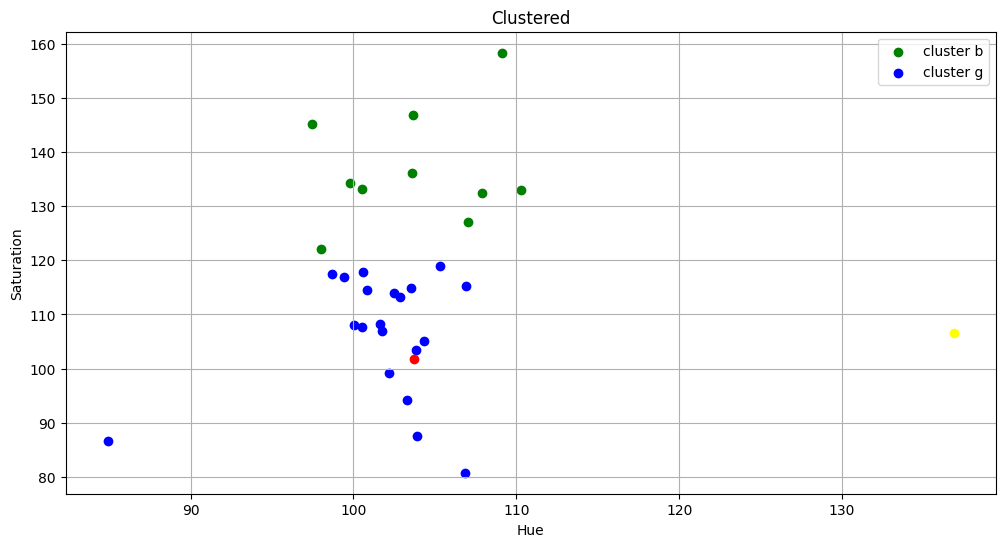

In [159]:
# Create an empty list to store legend labels
legend_labels = ["cluster b","cluster g"]

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []

# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))


cluster_0_points = np.array(cluster_0_points)
# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0],cluster_0_points[:,1],color="green")


cluster_1_points = np.array(cluster_1_points)
# Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0],cluster_1_points[:,1],color="blue")

# Calculate and plot centroids

centroid_0 = centroids[:,0]
centroid_1 = centroids[:,1]

# Plot both the centroid for cluster 0 and cluster 1 
plt.scatter(centroid_0[0],centroid_0[1],color='red')
plt.scatter(centroid_1[0],centroid_1[1],color='yellow')

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Clustered")
## Add a legend
plt.legend(legend_labels)
## Add grid
plt.grid()
## Show the plot
plt.show()

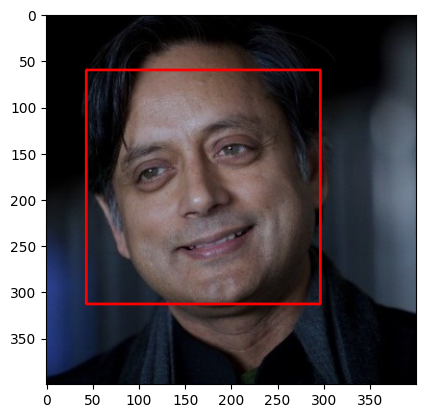

In [155]:
## Read the class of the template image 'Dr_Shashi_Tharoor.jpg' using cv2 and store it in template_img
template_img = cv2.imread("Dr_Shashi_Tharoor.jpg")
template_img=cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB)
gray=cv2.cvtColor(template_img,cv2.COLOR_RGB2GRAY)
plt.imshow(gray)
# Detect face  in the template image after converting it to gray and store it in template_faces
# Draw rectangles around the detected faces
template_faces= face_cascade.detectMultiScale(gray, 1.05, 4 )
for (x, y, w, h) in template_faces:
    cv2.rectangle(template_img, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(template_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()      

In [148]:
# hue=template_hsv[:,:,0]
# saturation=template_hsv[:,:,1]

# len(hue)
template_label

np.int32(0)

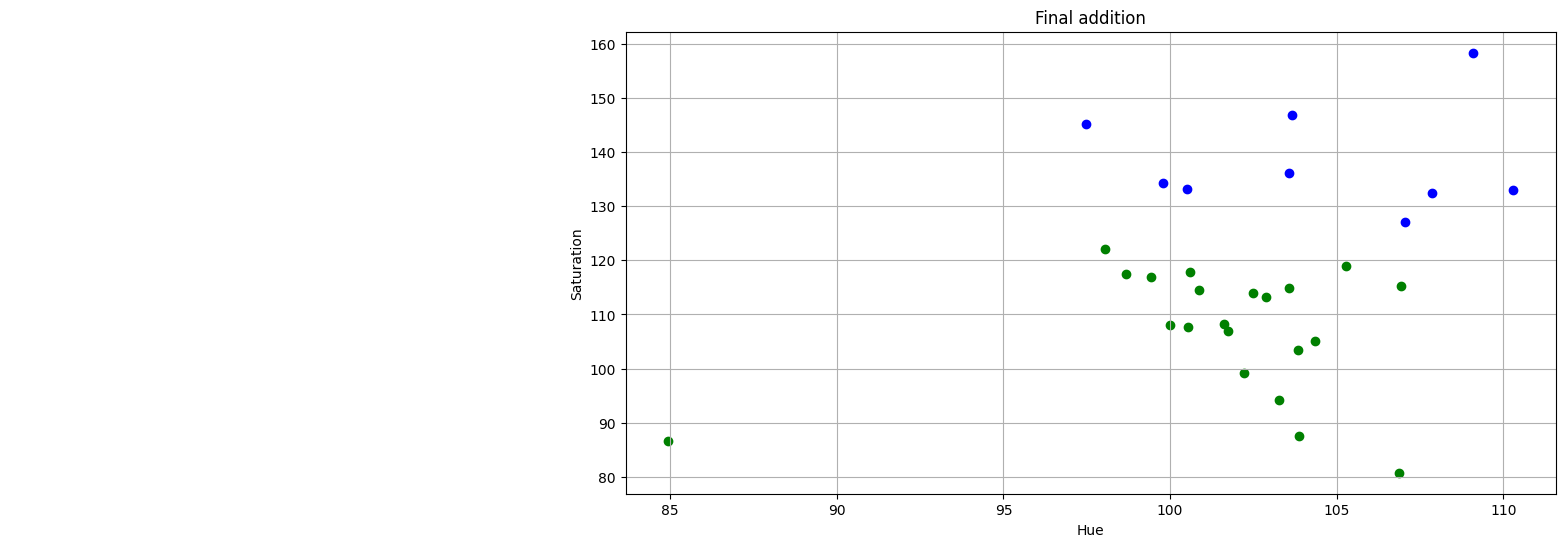

In [132]:
# Convert the template image to HSV color space and store it in template_hsv
template_hsv = cv2.cvtColor(template_img,cv2.COLOR_RGB2HSV)
# [hue,saturation,value]
# Extract hue and saturation features from the template image as we did it for detected faces.

template_hue =[]
template_saturation=[]


for (x, y, w, h) in template_faces:
    face = template_hsv[y:y + h, x:x + w]
    template_hue = np.mean(template_hsv[:, :, 0])
    template_saturation = np.mean(template_hsv[:, :, 1])
    hue_saturation.append((template_hue, template_saturation))

# Predict the cluster label for the template image and store it in template_label
template_label=kmeans.predict([[template_hue,template_saturation]])[0]
# Create a figure and axis for visualization
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the clustered faces with custom markers (similar to previous code)

# Plot points for cluster 0 in green
plt.scatter(cluster_0_points[:,0],cluster_0_points[:,1],color="green")
# # Plot points for cluster 1 in blue
plt.scatter(cluster_1_points[:,0],cluster_1_points[:,1],color="blue")


# Plot the template image in the respective cluster
if template_label == 0:
    color = 'red'
else:
    color = 'blue'
im = OffsetImage(cv2.cvtColor(cv2.resize(template_img, (20, 20)), cv2.COLOR_BGR2RGB))
ab = AnnotationBbox(im, (template_hue, template_saturation), frameon=False, pad=0)
ax.add_artist(ab)

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Final addition")
## Add grid
plt.grid()
## show plot
plt.show()

In [149]:
len(hue_saturation)

7

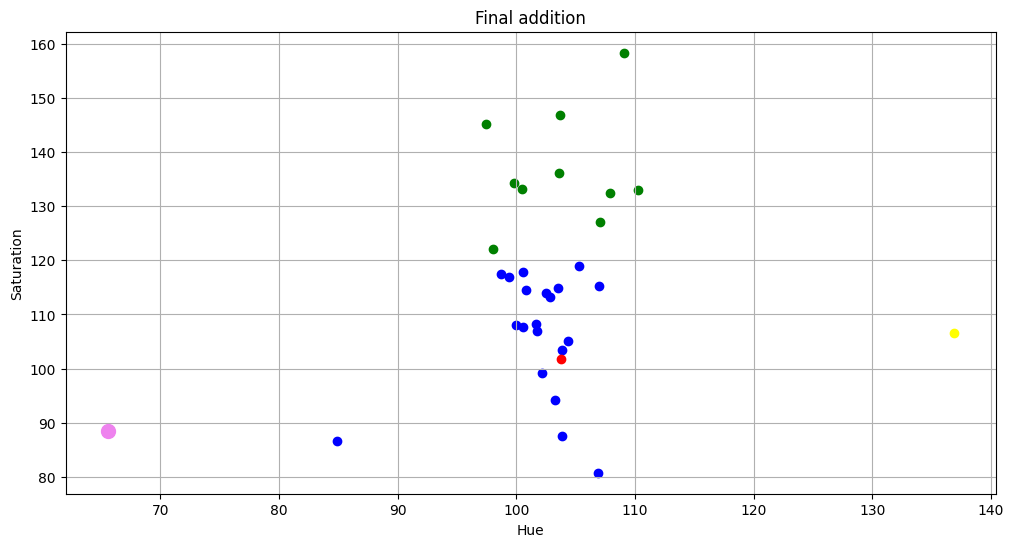

In [160]:
# Create an empty list to store legend labels
legend_labels = ["cluster b","cluster g"]

# Create lists to store points for each cluster
cluster_0_points = []
cluster_1_points = []
hue_saturation = np.array(hue_saturation)
# Your code for scatter plot goes here
fig, ax = plt.subplots(figsize=(12, 6))
for i, (x, y, w, h) in enumerate(faces_rect):
    if kmeans.labels_[i] == 0:
        cluster_0_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))
    else:
        cluster_1_points.append((hue_saturation[i, 0], hue_saturation[i, 1]))

# Plot points for cluster 0 in green
cluster_0_points = np.array(cluster_0_points)
plt.scatter(cluster_0_points[:,0],cluster_0_points[:,1],color="green")

# Plot points for cluster 1 in blue
cluster_1_points = np.array(cluster_1_points)
plt.scatter(cluster_1_points[:,0],cluster_1_points[:,1],color="blue")

# Calculate and plot centroids for both the clusters
centroid_0 =  centroids[:,0]
centroid_1 =  centroids[:,1]
plt.scatter(centroid_0[0],centroid_0[1],color='red') ## plot for centroid 0
plt.scatter(centroid_1[0],centroid_1[1],color='yellow')  ## plot for centroid 1
plt.plot(template_hue, template_saturation, marker='o', c= 'violet',markersize= 10, label=' Class ?' )

## Put x label
plt.xlabel("Hue")
## Put y label
plt.ylabel("Saturation")
## Put title
plt.title("Final addition")
## Add grid
plt.grid()
## show plot
plt.show()
                                            ## End of the lab 5 ##

## Report:
## Answer the following questions within your report:


#### 1. What are the common distance metrics used in distance-based classification algorithms? 
Manhattan Distance,Euclidean Distance,Mahalonobis Distance,Chebyshev Distance,Minkowski Distance,Cosine Distance,Hamming Distance are some common examples.

#### 2. What are some real-world applications of distance-based classification algorithms? 
Face Recognition,Language sentiment analysis,weather forecasting, virtual assstants etc.

#### 3. Explain various distance metrics. 
Manhattan distance(L1)-Distance between two points expressed along right angles.More effective in higher dimensional spaces than euclidean.
Euclidean distance(L2)-Distance between two vectors using square root of the sum of their vectors.It is a common standard distance metric
Mahalanobis distance-gives distance between a point P and from distribution D conceptually in terms of standard deviations.Its Correlation Awareness gives it an edge over other metrics.
Cosine distance-Distance given in terms of angle of difference between two vectors.It works very well in word embeddings.


#### 4. What is the role of cross validation in model performance? 
It is done so that one, the model can work on new data (preventing overfitting) while keeping a good segregation ability(to prevent underfitting). These concepts often have a trade off in models between variance and bias.

#### 5. Explain variance and bias in terms of KNN? 
In KNN, if the K value is large the borders are smoother. But if it is too large, it will always predict the majority class thus there will be an increase in bias.While if it is too small many outliers thereby increasing variance.